## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y.
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = data[:,0]
y = data[:,1]

#### Explore your data

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

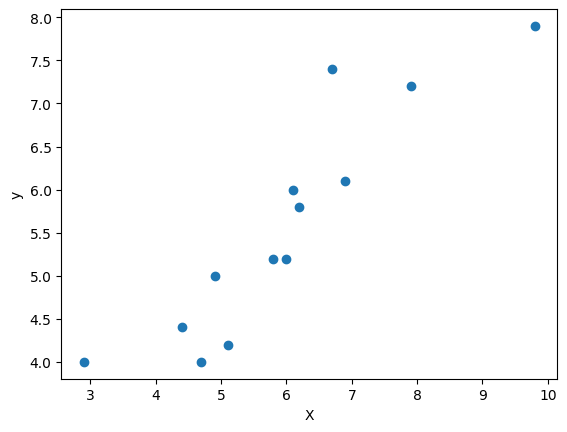

In [7]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [8]:
theta_0 = 0
theta_1 = 0
learning_rate = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [9]:
for i in range(len(X)):
    y_pred_GD = theta_0 + theta_1 * X
print('h(x) = ', y_pred_GD)

h(x) =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [10]:
Error_Vector = y_pred_GD - y
j = (1 / (2 * y.shape[0])) * np.sum(Error_Vector ** 2)
print('Error Vector: \n', Error_Vector)
print('\n j = ', j)

Error Vector: 
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

 j =  16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [11]:
d_theta_0 = (1 / y.shape[0]) * np.sum(Error_Vector)
d_theta_1 = (1 / y.shape[0]) * np.sum(Error_Vector * X)
print('d_theta_0 = ', d_theta_0)
print('d_theta_1 = ', d_theta_1)

d_theta_0 =  -5.569230739769231
d_theta_1 =  -35.043846043215375


### Step5: Update the parameters (simultaneously).

In [12]:
theta_0 = theta_0 - learning_rate * d_theta_0
theta_1 = theta_1 - learning_rate * d_theta_1
print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)

theta_0 =  0.0005569230739769231
theta_1 =  0.003504384604321538


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [13]:
theta_0 = 0
theta_1 = 0
learning_rate = 0.01
iterations = 1000
m = len(y)

for iteration in range(iterations):

    y_pred_GD = theta_0 + theta_1 * X


    Error_Vector = y_pred_GD - y
    j = (1 / (2 * m)) * np.sum(Error_Vector ** 2)


    d_theta_0 = (1 / (m)) * np.sum(Error_Vector)
    d_theta_1 = (1 /(m)) * np.sum(Error_Vector*X)
    Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])


    theta_0 = theta_0 - learning_rate * d_theta_0
    theta_1 = theta_1 - learning_rate * d_theta_1


    Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)


    print(f"\n****************** Iteration {iteration} ********************\n")
    print(f"h(x): {y_pred_GD}\n")
    print(f"Error Vector:\n{Error_Vector}\n")
    print(f"j = {j}\n")
    print(f"Gradient Vector:\n{Gradient_Vector}\n")
    print(f"Gradient Vector Norm:\n{Gradient_Vector_Norm}\n")
    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1}")

Streaming output truncated to the last 5000 lines.
Gradient Vector:
[[-0.05219442]
 [ 0.00815773]]

Gradient Vector Norm:
0.05282808152433783

theta_0_new : 0.6830212201755465
theta_1_new : 0.8119207673071247

****************** Iteration 783 ********************

h(x): [3.03759152 6.12289021 4.66143306 7.09719536 8.63984489 6.28527459
 5.63573782 5.71692982 5.55454582 4.82381706 4.49904867 4.25547267
 5.39216183]

Error Vector:
[-0.96240848 -1.27710989 -0.33856694 -0.10280445  0.7398448   0.18527469
 -0.36426218 -0.08307037  0.35454602  0.62381725  0.49904867 -0.14452742
  0.19216202]

j = 0.16251675230570148

Gradient Vector:
[[-0.05215818]
 [ 0.00815206]]

Gradient Vector Norm:
0.052791395933507124

theta_0_new : 0.6835428019361818
theta_1_new : 0.8118392466629086

****************** Iteration 784 ********************

h(x): [3.03787669 6.1228656  4.66155519 7.09707293 8.63956757 6.28523368
 5.63576213 5.71694598 5.55457828 4.82392288 4.49918711 4.25563556
 5.39221059]

Error Vector

In [14]:
theta_0 = 0
theta_1 = 0
learning_rate = 0.01
max_iterations = 1000
tolerance = 0.1
m = len(y)

for iteration in range(max_iterations):
    y_pred_GD = theta_0 + theta_1 * X
    Error_Vector = y_pred_GD - y
    j = (1 / (2 * m)) * np.sum(Error_Vector ** 2)
    d_theta_0 = (1 / m) * np.sum(Error_Vector)
    d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
    Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
    Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

    print(f"\n****************** Iteration {iteration} ********************\n")
    print(f"h(x):{y_pred_GD}\n")
    print(f"Error Vector:\n{Error_Vector}\n")
    print(f"j = {j}\n")
    print(f"Gradient Vector:\n{Gradient_Vector}\n")
    print(f"Gradient Vector Norm:\n{Gradient_Vector_Norm}\n")

    if Gradient_Vector_Norm < tolerance:
        print("\n****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {iteration} iterations\n")
        print(f"theta_0_Opt : {theta_0:.15f}")
        print(f"theta_1_Opt : {theta_1:.15f}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost = {j}\n")
        print(f"h(x) = y_predict:\n{y_pred_GD}\n")
        print(f"y_actual:\n{y}\n")
        break

    theta_0 -= learning_rate * d_theta_0
    theta_1 -= learning_rate * d_theta_1
else:
    print("\n****************** Training Report ********************\n")
    print("Gradient Descent did not converge within the maximum number of iterations.")
    print(f"Last Gradient Norm: {Gradient_Vector_Norm}")
    print(f"Last Cost Value: {j}\n")
    print(f"theta_0_Opt : {theta_0:.15f}")
    print(f"theta_1_Opt : {theta_1:.15f}\n")



****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692318

Gradient Vector:
[[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
35.483622652335995


****************** Iteration 1 ********************

h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043305

Gradient Vector:
[[ -3.42708175]
 [-21.33845263]]

Gradient Vector Norm:
21.611905283072655


****************** Iteration 2 ********************

h(x):[1.72504984 3.86757703 2.85269581 4.54416477 5.61542

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [15]:
y_pred = theta_0 + theta_1 * X
print('h(x) = y_predict: \n', y_pred)
print('\n y_actual: \n', y)

h(x) = y_predict: 
 [2.74498295 6.14196626 4.53286904 7.21469817 8.91319004 6.32075512
 5.60560052 5.69499474 5.5162063  4.71165748 4.35408017 4.08589751
 5.33741786]

 y_actual: 
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

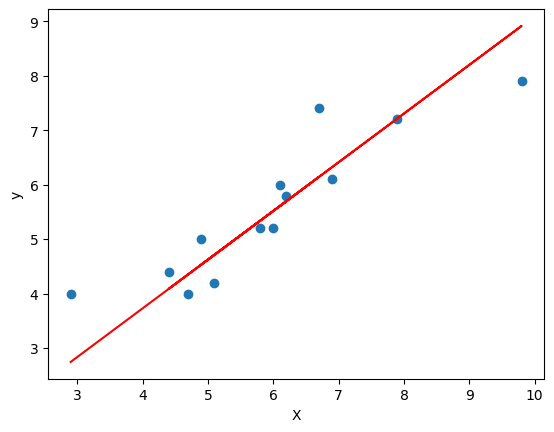

In [16]:
plt.scatter(X,y)
plt.plot(X,y_pred_GD, color = 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [17]:
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.7480324921408193

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [18]:
theta_0 = 0
theta_1 = 0
learning_rate = 0.01
max_iterations = 1000
tolerance = 0.1
m = len(y)

loss_history = []

for iteration in range(max_iterations):
    y_pred_GD = theta_0 + theta_1 * X
    Error_Vector = y_pred_GD - y
    j = (1 / (2 * m)) * np.sum(Error_Vector ** 2)
    d_theta_0 = (1 / m) * np.sum(Error_Vector)
    d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
    Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
    Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

    loss_history.append(j)

    print(f"\n****************** Iteration {iteration} ********************\n")
    print(f"h(x):{y_pred_GD}\n")
    print(f"Error Vector:\n{Error_Vector}\n")
    print(f"j = {j}\n")
    print(f"Gradient Vector:\n{Gradient_Vector}\n")
    print(f"Gradient Vector Norm:\n{Gradient_Vector_Norm}\n")

    if Gradient_Vector_Norm < tolerance:
        print("\n****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {iteration} iterations\n")
        print(f"theta_0_Opt : {theta_0:.15f}")
        print(f"theta_1_Opt : {theta_1:.15f}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost = {j}\n")
        print(f"h(x) = y_predict:\n{y_pred_GD}\n")
        print(f"y_actual:\n{y}\n")
        break

    theta_0 -= learning_rate * d_theta_0
    theta_1 -= learning_rate * d_theta_1
else:
    print("\n****************** Training Report ********************\n")
    print("Gradient Descent did not converge within the maximum number of iterations.")
    print(f"Last Gradient Norm: {Gradient_Vector_Norm}")
    print(f"Last Cost Value: {j}\n")
    print(f"theta_0_Opt : {theta_0:.15f}")
    print(f"theta_1_Opt : {theta_1:.15f}\n")


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692318

Gradient Vector:
[[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
35.483622652335995


****************** Iteration 1 ********************

h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043305

Gradient Vector:
[[ -3.42708175]
 [-21.33845263]]

Gradient Vector Norm:
21.611905283072655


****************** Iteration 2 ********************

h(x):[1.72504984 3.86757703 2.85269581 4.54416477 5.61542

### Plot loss vs. iterations

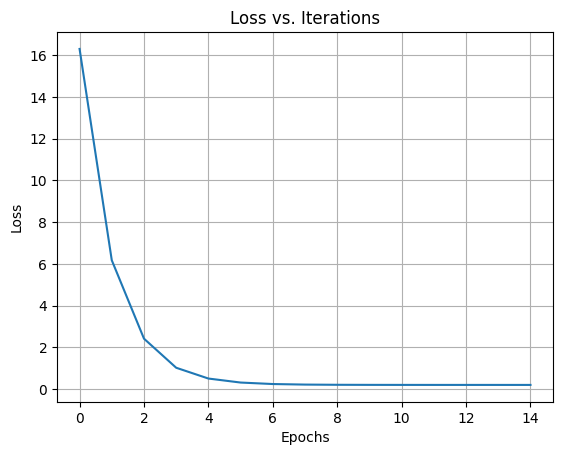

In [19]:
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid()
plt.show()

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [20]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [21]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [29]:
X2 = data2[:,0:3]
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [30]:
y2 = data2[:,3]
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b>
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [31]:
import numpy as np

def MultiVarReg(X2, y2, learning_rate=0.0001, max_iterations=5000, tolerance=0.1):
    m = X2.shape[0]
    n = X2.shape[1]
    X2 = np.hstack([np.ones((m, 1)), X2])
    theta = np.zeros(n + 1)
    loss_history = []

    for iteration in range(max_iterations):
        y_pred_GD = X2.dot(theta)
        Error_Vector = y_pred_GD - y2
        j = (1 / (2 * m)) * np.sum(Error_Vector ** 2)
        gradient = (1 / m) * X2.T.dot(Error_Vector)
        Gradient_Vector_Norm = np.linalg.norm(gradient)

        loss_history.append(j)

        print(f"\n****************** Iteration {iteration} ********************\n")
        print(f"h(x):\n {y_pred_GD}")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"j = {j}\n")
        print(f"Gradient Vector:\n{gradient}\n")
        print(f"Gradient Vector Norm: {Gradient_Vector_Norm}\n")
        print(f"thetas_new :\n{theta}\n")

        if Gradient_Vector_Norm < tolerance:
            print("\n****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {iteration} iterations\n")
            print(f"Optimal theta:\n{theta}\n")
            print(f"Final Cost = {j}\n")
            break

        theta -= learning_rate * gradient

    # Check if max iterations reached without converging
    if Gradient_Vector_Norm >= tolerance:
        print("\n****************** Training Report ********************\n")
        print(f"Gradient Descent stopped after reaching max iterations ({max_iterations})\n")
        print(f"Final theta:\n{theta}\n")
        print(f"Final Cost = {j}\n")

    return theta, loss_history

In [32]:
theta, loss_history = MultiVarReg(X2, y2)

Streaming output truncated to the last 5000 lines.

h(x):
 [152.92989054 184.61601928 181.38319007 198.8538281  139.91122772
 105.26232309 150.56859707 114.00486987 174.32436781 164.43647749
 143.95624573 142.80111316 186.06306725 152.84355899 151.52600834
 188.51901086 144.21752445 181.34514681 177.05092317 158.567179
 176.21834271 174.42322846 167.566794   151.09627703 190.58838893]
Error Vector:
[ 0.92989054 -0.38398072  1.38319007  2.8538281  -2.08877228  4.26232309
  1.56859707 -0.99513013 -0.67563219  0.43647749  2.95624573  1.80111316
  2.06306725  0.84355899  3.52600834 -3.48098914 -2.78247555 -1.65485319
  0.05092317 -0.432821   -0.78165729 -0.57677154 -7.433206    2.09627703
 -1.41161107]

j = 3.0490589543960165

Gradient Vector:
[ 0.082944    0.05770901 -0.0266597  -0.03103173]

Gradient Vector Norm: 0.10901258789639338

thetas_new :
[-0.01583856  0.36059537  0.52813596  1.12495187]


****************** Iteration 3326 ********************

h(x):
 [152.92990699 184.61599749 1

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [33]:
m = X2.shape[0]
X2 = np.hstack([np.ones((m, 1)), X2])
y_pred_GD_Multi = X2.dot(theta)
print('h(x) = y_predict: \n', y_pred_GD_Multi)
print('\n y_actual: \n', y2)

h(x) = y_predict: 
 [152.93271151 184.61231886 181.38322157 198.85544308 139.90499943
 105.25867203 150.57363082 114.01431493 174.32084699 164.43562114
 143.95734843 142.79946086 186.06153677 152.83944858 151.53012506
 188.51733974 144.20948104 181.35413506 177.0503019  158.56752095
 176.22294238 174.42154366 167.57132207 151.09544099 190.5850901 ]

 y_actual: 
 [152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


### Plot loss vs. iterations

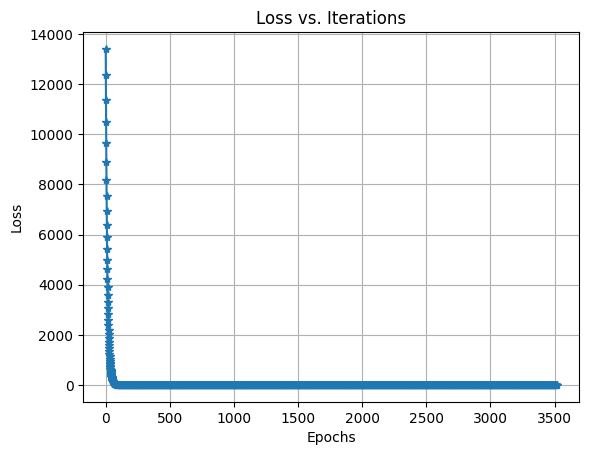

In [34]:
plt.plot(range(len(loss_history)),loss_history, marker = '*')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid()
plt.show()

#### Use R2 score to evaluate LR equation output

In [35]:
r2_score(y2,y_pred_GD_Multi)

0.9890131164245575